# Car Sales Analysis

This project analyzes car sales data to uncover patterns and insights in the automobile market.  
The analysis includes data cleaning, exploratory data analysis (EDA), and visualizations to highlight key trends such as popular brands, price distributions, and the effect of factors like fuel type and transmission. (All prices are in Indian Rupees (INR), as the dataset comes from CarDekho)


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("car_dekho_cars.csv")

# check first 5 rows
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Cleaning the data

In [2]:
# Checking info & size & types
df.info()

# checking for duplicates
print("\nDuplicated rows:",df.duplicated().sum())

# Count missing (NaN) values per column
print("\nMissing values per column:")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB

Duplicated rows: 763

Missing values per column:


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [3]:
# removing duplicates
df = df.drop_duplicates()

print("Duplicates after cleaning:", df.duplicated().sum())
print("New shape:", df.shape)


Duplicates after cleaning: 0
New shape: (3577, 8)


# Exploratory Data Analysis (EDA)

In [4]:
# how many unique car names
print("Unique car names:",df['name'].nunique())

# common car names
print("\nCommon car names",df['name'].value_counts().head(10))

# Create a new column "brand" by taking the first word from 'name'
df['brand'] = df['name'].str.split().str[0]

# Check top 10 most common brands
print("\n",df['brand'].value_counts().head(10))


Unique car names: 1491

Common car names name
Maruti Swift Dzire VDI      54
Maruti Alto 800 LXI         48
Maruti Alto LXi             42
Maruti Alto LX              30
Maruti Swift VDI BSIV       28
Hyundai EON Era Plus        28
Maruti Wagon R VXI BS IV    26
Maruti Swift VDI            23
Maruti Wagon R LXI Minor    21
Hyundai Santro Xing GLS     20
Name: count, dtype: int64

 brand
Maruti        1072
Hyundai        637
Mahindra       328
Tata           308
Ford           220
Honda          216
Toyota         170
Chevrolet      151
Renault        110
Volkswagen      93
Name: count, dtype: int64


In [5]:
import numpy as np

# prevent scientific notation in pandas
pd.set_option('display.float_format', '{:.0f}'.format)

# summary stats
print(df['selling_price'].describe())


count      3577
mean     473913
std      509302
min       20000
25%      200000
50%      350000
75%      600000
max     8900000
Name: selling_price, dtype: float64


In [6]:
# Extra summary
# Km 
print(df['km_driven'].describe())

# Fuel type counts
print("\nFuel types:")
print(df['fuel'].value_counts())

# Transmission counts
print("\nTransmission types:")
print(df['transmission'].value_counts())

# Owner counts
print("\nOwner types:")
print(df['owner'].value_counts())

count     3577
mean     69251
std      47580
min          1
25%      36000
50%      60000
75%      90000
max     806599
Name: km_driven, dtype: float64

Fuel types:
fuel
Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: count, dtype: int64

Transmission types:
transmission
Manual       3265
Automatic     312
Name: count, dtype: int64

Owner types:
owner
First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: count, dtype: int64


# Car Sales Data Visualization and Insights

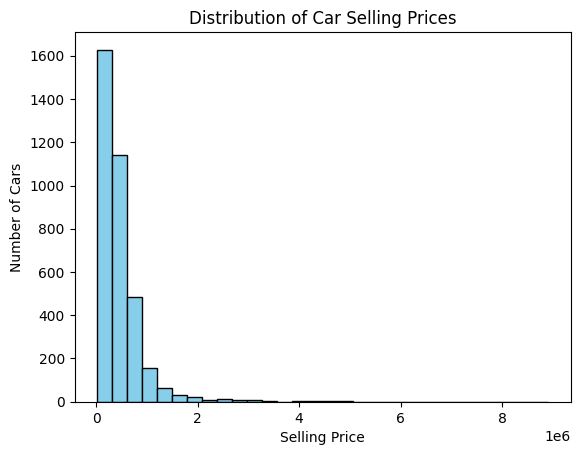

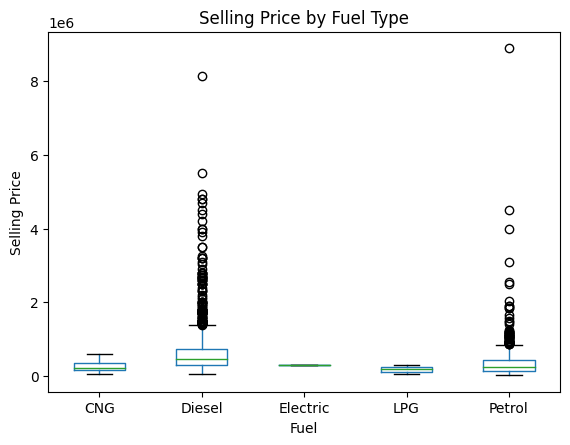

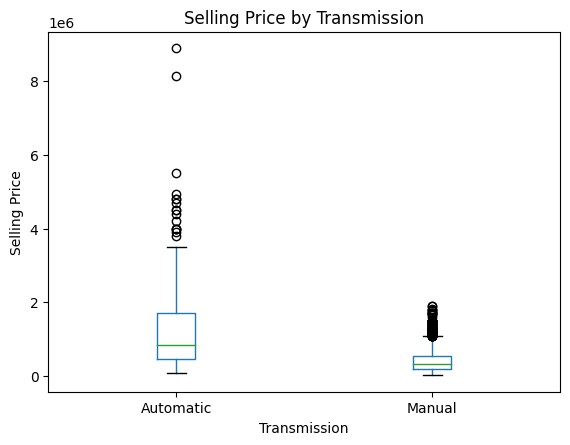

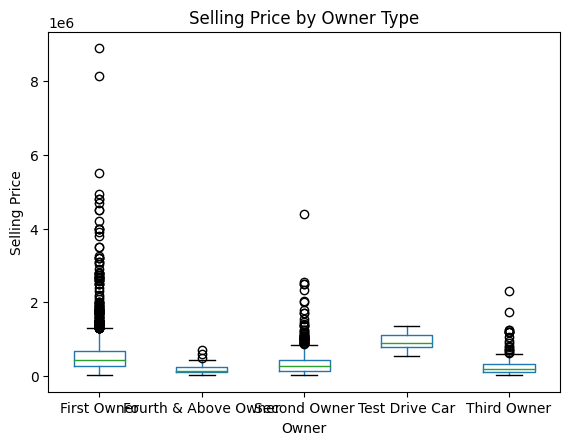

In [7]:
import matplotlib.pyplot as plt

# add car_age column
df['car_age'] = 2025 - df['year']

# 1. distribution of car prices
plt.hist(df['selling_price'], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Car Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Number of Cars")
plt.show()

# 2. price by fuel type
df.boxplot(column='selling_price', by='fuel', grid=False)
plt.title("Selling Price by Fuel Type")
plt.suptitle("")
plt.xlabel("Fuel")
plt.ylabel("Selling Price")
plt.show()

# 3. price by transmission
df.boxplot(column='selling_price', by='transmission', grid=False)
plt.title("Selling Price by Transmission")
plt.suptitle("")
plt.xlabel("Transmission")
plt.ylabel("Selling Price")
plt.show()

# 4. price by owner type
df.boxplot(column='selling_price', by='owner', grid=False)
plt.title("Selling Price by Owner Type")
plt.suptitle("")
plt.xlabel("Owner")
plt.ylabel("Selling Price")
plt.show()

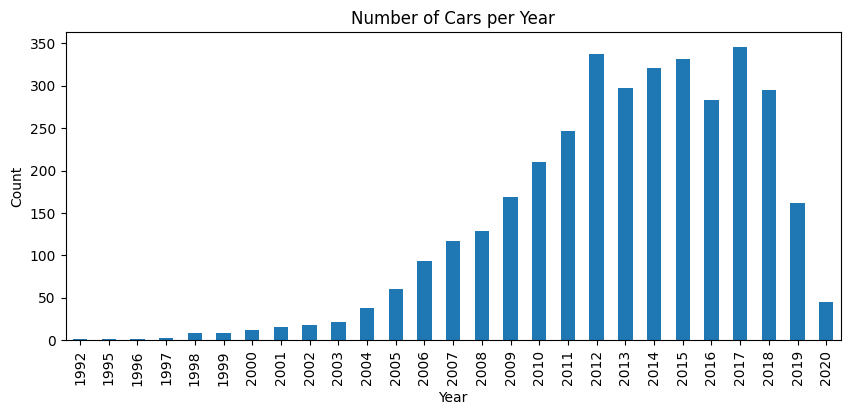

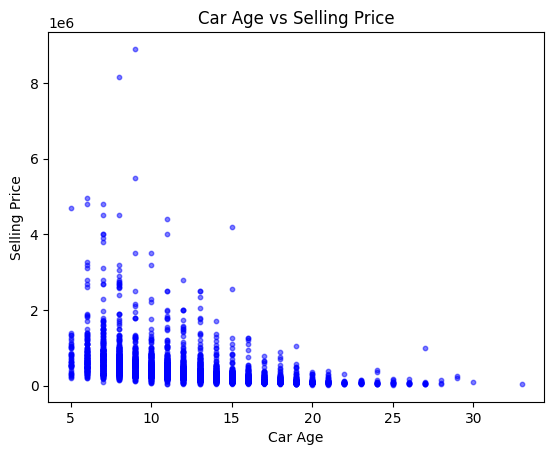

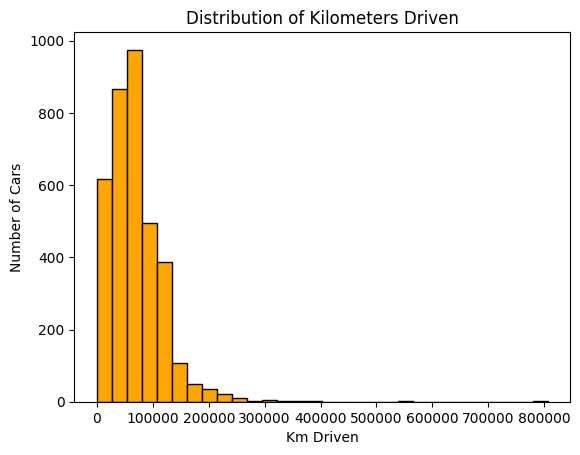

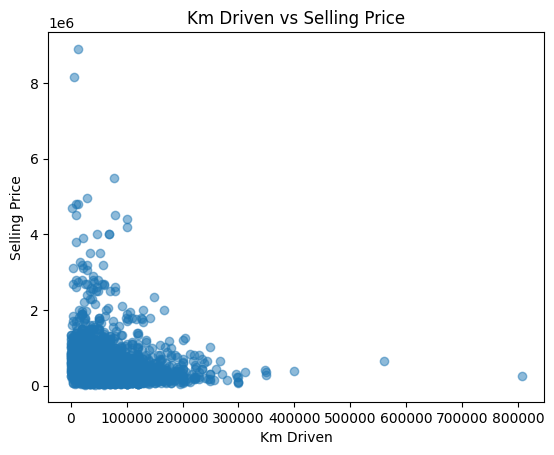

In [8]:

# 5. number of cars per year
df['year'].value_counts().sort_index().plot(kind="bar", figsize=(10,4))
plt.title("Number of Cars per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# 6. car age vs selling price
plt.scatter(df['car_age'], df['selling_price'], alpha=0.5, s=10, c="blue")
plt.title("Car Age vs Selling Price")
plt.xlabel("Car Age")
plt.ylabel("Selling Price")
plt.show()

# 7. distribution of kilometers driven
plt.hist(df['km_driven'], bins=30, color="orange", edgecolor="black")
plt.title("Distribution of Kilometers Driven")
plt.xlabel("Km Driven")
plt.ylabel("Number of Cars")
plt.show()

# 8. km driven vs selling price
plt.scatter(df['km_driven'], df['selling_price'], alpha=0.5)
plt.title("Km Driven vs Selling Price")
plt.xlabel("Km Driven")
plt.ylabel("Selling Price")
plt.show()



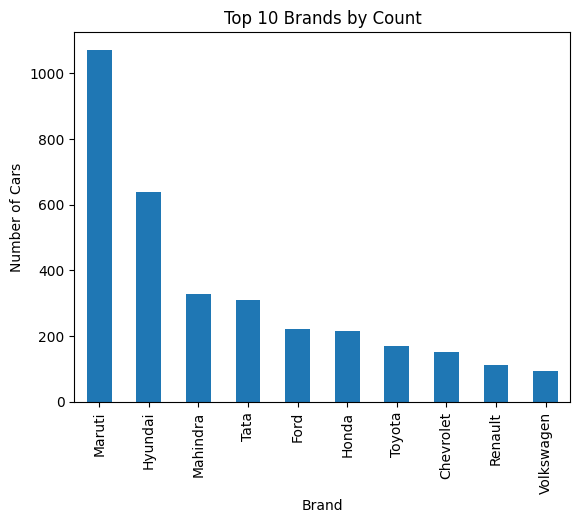

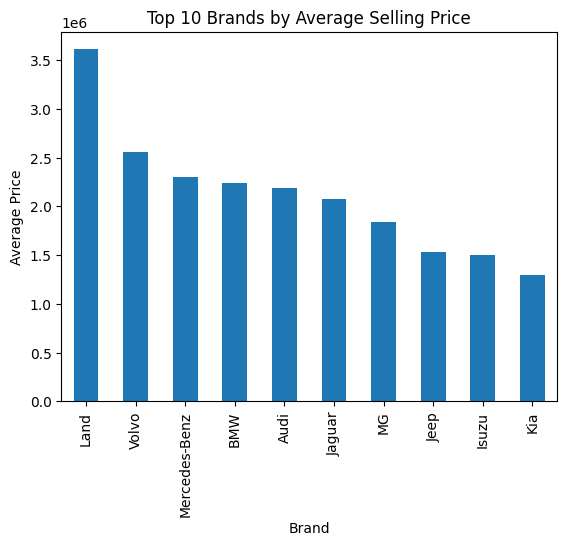

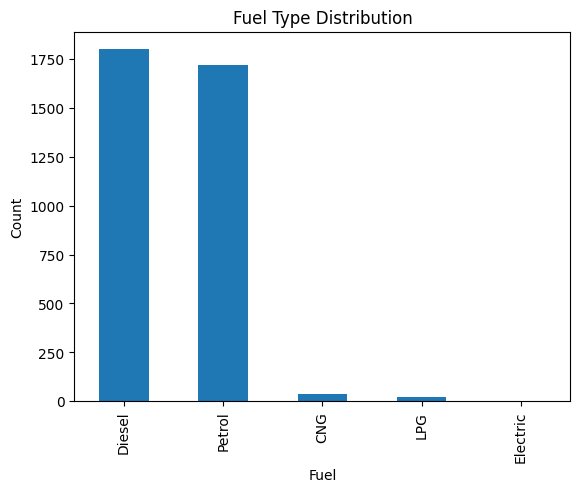

In [9]:

# 9. top 10 brands by count
df['brand'].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Brands by Count")
plt.xlabel("Brand")
plt.ylabel("Number of Cars")
plt.show()

# 10. top 10 brands by average price
df.groupby('brand')['selling_price'].mean().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top 10 Brands by Average Selling Price")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.show()

# 11. fuel type distribution
df['fuel'].value_counts().plot(kind="bar")
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel")
plt.ylabel("Count")
plt.show()



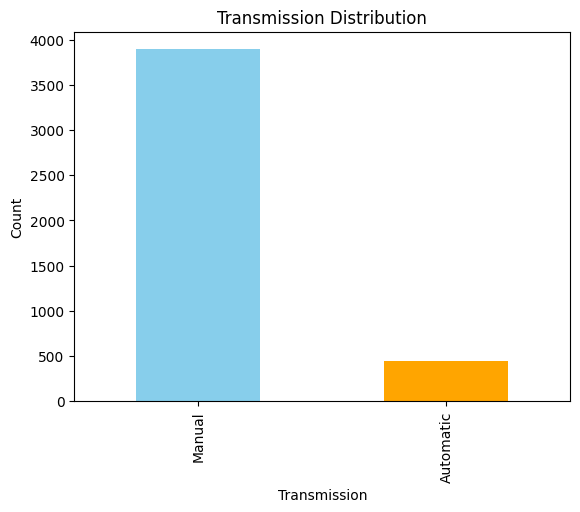

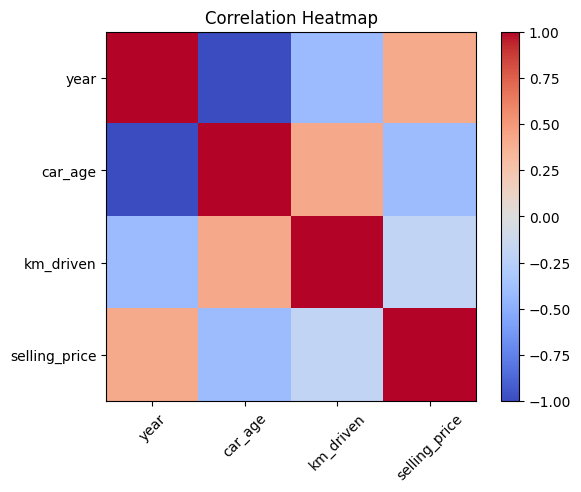

In [24]:
# 12. transmission distribution
df['transmission'].value_counts().plot(
    kind="bar",
    color=['skyblue', 'orange']  # specify colors here directly
)

plt.title("Transmission Distribution")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.show()

# 13. correlation heatmap
import numpy as np
corr = df[['year','car_age','km_driven','selling_price']].corr()

plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()

# Car Segmentation Using K-Means Clustering

Cluster
0    1876
1    1610
2      91
Name: count, dtype: int64


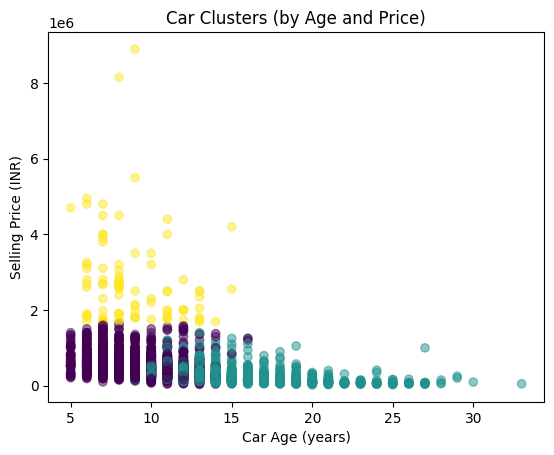

In [13]:
# K-Means Clustering on Cars
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# select features for clustering
features = df[['car_age', 'km_driven', 'selling_price']]

# scale features (important for K-Means)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# choose number of clusters 
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# check cluster distribution
print(df['Cluster'].value_counts())

# plot clusters (car age vs price as example)
plt.scatter(df['car_age'], df['selling_price'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title("Car Clusters (by Age and Price)")
plt.xlabel("Car Age (years)")
plt.ylabel("Selling Price (INR)")
plt.show()


## 🔹 Interpreting the Car Clusters

The K-Means algorithm grouped the cars into three main clusters:

- **Cluster 0 (Older Budget Cars):** Cars with higher age, higher kilometers driven, and lower selling prices.  
- **Cluster 1 (Mid-Range Cars):** Cars that are relatively newer, moderately priced, and have mid-level usage.  
- **Cluster 2 (Premium Cars):** A small group of newer cars with very high selling prices, often representing luxury brands.  

These clusters highlight how cars naturally segment into **budget, mid-range, and premium categories** based on age, mileage, and price.


#  Data Preparation, Training & Saving Model

In this step, we train a **Linear Regression model** to predict the **selling price of cars** based on features such as year, kilometers driven, fuel type, transmission, ownership history, and brand. The dataset has already been cleaned and encoded so that the model can work with numerical inputs. After training, we will also evaluate the model to see how well it performs on unseen data.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
import pandas as pd

# one-hot encode categorical features
df_encoded = pd.get_dummies(
    df,
    columns=['fuel', 'transmission', 'owner', 'seller_type', 'brand'],
    drop_first=True
)


# features (X) and target (y)
X = df_encoded.drop(['selling_price', 'name'], axis=1)
y = df_encoded['selling_price']

# train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# save trained model
joblib.dump(model, "car_price_model.pkl")

print("Model trained and saved as car_price_model.pkl")

Model trained and saved as car_price_model.pkl


In [20]:
# Evaluate model
from sklearn.metrics import r2_score, mean_absolute_error

# predictions on test set
y_pred = model.predict(X_test)

# evaluation metrics
print("R² score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R² score: 0.5299037175179133
MAE: 184882.00841652564


 **The Linear Regression model has an R² of about 0.53 and a Mean Absolute Error (MAE) of around 185,000 INR. This means it explains only about half of the differences in car prices, and predictions can be quite off, especially for very cheap or expensive cars. The accuracy is limited because car prices depend on complex, non-linear patterns that a simple linear model cannot capture. In the future, stronger models like Random Forests or Gradient Boosting could give better predictions.**

In [23]:
def predict_price(year, km_driven, fuel, transmission, owner, seller, brand):
    # start with all zeros
    car = pd.DataFrame(0, index=[0], columns=X_train.columns)
    
    # fill numerical
    car['year'] = year
    car['km_driven'] = km_driven
    car['car_age'] = 2025 - year
    
    # fill categorical
    col_fuel = f'fuel_{fuel}'
    col_trans = f'transmission_{transmission}'
    col_owner = f'owner_{owner}'
    col_seller = f'seller_type_{seller}'
    col_brand = f'brand_{brand}'
    
    for col in [col_fuel, col_trans, col_owner, col_seller, col_brand]:
        if col in car.columns:
            car[col] = 1
    
    # predict
    return int(model.predict(car)[0])
    
predict_price(2018, 40000, "Petrol", "Manual", "First Owner", "Dealer", "Hyundai")


555493

## Conclusion

In this project, we explored car sales data to better understand the factors that influence vehicle prices. After cleaning the dataset, we performed an analysis of key features such as year, mileage, fuel type, transmission, ownership history, and brand. Visualizations helped us see important trends, like how car age affects selling price, the strong presence of manual transmission vehicles, and differences in price across fuel types and brands.

This analysis provided a clear overview of the car market in the dataset and highlighted patterns that can be useful for buyers, sellers, or dealerships. The project shows how data analysis and visualization can turn raw data into meaningful insights.
